<a href="https://colab.research.google.com/github/The237/DeepLearningCourses/blob/main/05_Introduction_au_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds

In [5]:
imdb_sentences = []
imdb_labels = []

In [33]:
import random

In [6]:
train_data = tfds.as_numpy(tfds.load('imdb_reviews', split="train"))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9UOAEI/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9UOAEI/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9UOAEI/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


# Data Exploration

In [83]:
imdb_sentences = []
imdb_labels = []

# 0 : Négatif, 1 : Positif
for item in train_data:
  # convert to sentences because item["text"] are bytes
  imdb_sentences.append(str(item['text']))
  imdb_labels.append(item['label'])

In [34]:
n_training = 20_000

In [86]:
training_sentences = imdb_sentences[:n_training]
test_sentences = imdb_sentences[n_training:]

training_labels = imdb_labels[:n_training]
test_labels = imdb_labels[n_training:]
len(training_sentences),len(test_sentences)


(20000, 5000)

# Data Processing

## Tokenisation (phrases to list of words)

In [48]:
phrases = ["Je suis au marché","Je travaille au marché","Je l'ai vu au marché"]

In [40]:
phrase.split(" ")

['Je', 'suis', 'au', 'marché']

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [44]:
tokenizer = Tokenizer()

In [49]:
tokenizer.fit_on_texts(phrases)

In [50]:
tokenizer.word_index

{'je': 1, 'au': 2, 'marché': 3, 'suis': 4, 'travaille': 5, "l'ai": 6, 'vu': 7}

In [51]:
tokenizer.texts_to_sequences(phrases)

[[1, 4, 2, 3], [1, 5, 2, 3], [1, 6, 7, 2, 3]]

In [52]:
test = ["je vends au Marché"]

In [53]:
tokenizer.texts_to_sequences(test) # je au marché

[[1, 2, 3]]

In [55]:
test = ["Hello, je viens"]
tokenizer.texts_to_sequences(test)

[[1]]

In [56]:
tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")

In [62]:
tokenizer.fit_on_texts(phrases)
tokenizer.word_index

{'<OOV>': 1,
 'je': 2,
 'au': 3,
 'marché': 4,
 'suis': 5,
 'travaille': 6,
 "l'ai": 7,
 'vu': 8,
 'hello': 9,
 'viens': 10}

In [64]:
test = ["Hello, je m'en sors au marché avec part"]
tokenizer.texts_to_sequences(test)

[[9, 2, 1, 1, 3, 4, 1, 1]]

# Padding (Ajouter des 0 aux phrases afin qu'elles aient le même taille que la plus longue phrase du dataset)

In [65]:
phrases = ["Je suis au marché",
           "Je travaille au marché",
           "es-tu rentré du marché",
           "Je nettoie le marché tous les jours avant de commencer à vender le matin"
           ]

tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")
tokenizer.fit_on_texts(phrases)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(phrases)

In [67]:
word_index

{'<OOV>': 1,
 'marché': 2,
 'je': 3,
 'au': 4,
 'le': 5,
 'suis': 6,
 'travaille': 7,
 'es': 8,
 'tu': 9,
 'rentré': 10,
 'du': 11,
 'nettoie': 12,
 'tous': 13,
 'les': 14,
 'jours': 15,
 'avant': 16,
 'de': 17,
 'commencer': 18,
 'à': 19,
 'vender': 20,
 'matin': 21}

In [66]:
sequences

[[3, 6, 4, 2],
 [3, 7, 4, 2],
 [8, 9, 10, 11, 2],
 [3, 12, 5, 2, 13, 14, 15, 16, 17, 18, 19, 20, 5, 21]]

In [68]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [69]:
pad_sequences(sequences)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  6,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  7,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  9, 10, 11,  2],
       [ 3, 12,  5,  2, 13, 14, 15, 16, 17, 18, 19, 20,  5, 21]],
      dtype=int32)

In [72]:
pad_sequences(sequences, padding="post", maxlen=7, truncating="post")

array([[ 3,  6,  4,  2,  0,  0,  0],
       [ 3,  7,  4,  2,  0,  0,  0],
       [ 8,  9, 10, 11,  2,  0,  0],
       [ 3, 12,  5,  2, 13, 14, 15]], dtype=int32)

# Stop Words

In [73]:
phrase = "Je vais au marché le jeudi"

In [74]:
stopwords = ["au","le"]

In [76]:
words = phrase.split(" ")
phrase_clean = []

for word in words:
  if word not in stopwords:
    phrase_clean.append(word)

In [77]:
phrase_clean

['Je', 'vais', 'marché', 'jeudi']

# Approche intuitive du calcul du Sentiment

In [80]:
phrase = "Votre connexion est agréablement lente"

In [ ]:
{
    "Votre":[],
    "connexion":[],
    "est":[],
    "agréablement":[],
    "lente":[],
}

In [84]:
training_sentences[45]

b"The director Sidney J. Furie has created in Hollow Point a post-modern absurdist masterpiece that challenges and constantly surprises the audience. <br /><br />Sidney J. Furie dares to ask the question of what happens to the tired conventional traditionalist paradigms of 'plot' and 'characterisation' when you remove the crutches of 'motivation' and 'reason'. <br /><br />The result leads me to say that my opinion of him could not possibly get any higher.<br /><br />One and a half stars.<br /><br />P.S. Nothing in this movie makes any sense, the law enforcement agents are flat out unlikeable and the organised criminals are full on insane."

# Embedding (plongement)

In [94]:
tokenizer = Tokenizer(num_words=20_000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post",maxlen=15, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post",maxlen=15, truncating="post")

In [96]:
len(training_padded[42])

15

In [97]:
training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

### La couche Embedding

In [104]:
from tensorflow.keras.layers import Embedding
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [103]:
model = tf.keras.models.Sequential(
    [
        # 20_000 pour la taille du vocabulaire
        Embedding(20_000, 20),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation ="relu"),
        tf.keras.layers.Dense(1, activation ="sigmoid")
    ]
)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [105]:
best_model = "best_model_text.h5"
# permet de sauvegarder le meileur modèle au cours de l'entrainement
model_ckp = ModelCheckpoint(filepath = best_model,
                            monitor = "val_accuracy",
                            mode ="max",
                            save_best_only = True)
# On arrête l'entrainement si après deux époques la performance du modèle n'augmente plus (sur la base de l'accuracy)
# si c'était sur la base du loss (on observerait plutôt la dimunition)
stop = EarlyStopping(monitor = "val_accuracy", patience = 6)

In [102]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          400000    
                                                                 
 global_average_pooling1d (  (None, 20)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 400177 (1.53 MB)
Trainable params: 400177 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
h = model.fit(training_padded, training_labels, epochs = 50,
              validation_data=(test_padded,test_labels),
              callbacks= [model_ckp])

Epoch 1/50
625/625 [==============================] - 8s 13ms/step - loss: 0.2558 - accuracy: 0.8964 - val_loss: 0.8954 - val_accuracy: 0.6728
Epoch 2/50
625/625 [==============================] - 6s 10ms/step - loss: 0.2446 - accuracy: 0.9032 - val_loss: 0.9519 - val_accuracy: 0.6700
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2345 - accuracy: 0.9069 - val_loss: 1.0117 - val_accuracy: 0.6638
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2260 - accuracy: 0.9102 - val_loss: 1.0489 - val_accuracy: 0.6602
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2186 - accuracy: 0.9126 - val_loss: 1.0681 - val_accuracy: 0.6582
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2106 - accuracy: 0.9176 - val_loss: 1.1349 - val_accuracy: 0.6554
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2046 - accuracy: 0.9198 - val_loss: 1.1731 - val_accuracy: 0.6568
Epoc

In [112]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

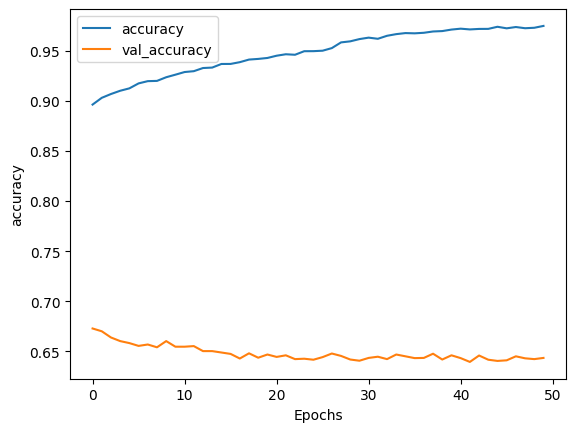

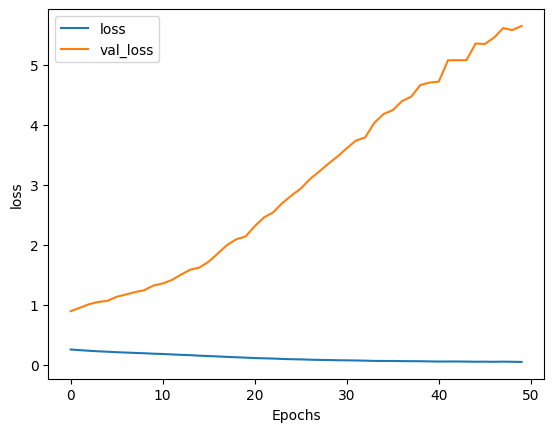

In [113]:
plot_graphs(h, "accuracy")
plot_graphs(h, "loss")

Ces graphiques mettent en exergue une large over fitting très grave i.e le modèle performe bien sur les données d'entrainement, mais performe mal sur les données de test.

# Vocab Size

In [115]:
word_count = tokenizer.word_counts

In [119]:
word_count = sorted(word_count.items(), key=lambda t:t[1], reverse = True)

In [122]:
import pandas as pd

In [124]:
df = pd.DataFrame(word_count, columns=["words","frequency"])

In [137]:
df[df["frequency"]>5]

,words,frequency
0,the,268774
1,and,131448
2,a,130000
3,of,116684
4,to,108554
...,...,...
24429,dornhelm,6
24430,donnison,6
24431,cray,6
24432,morand,6


In [129]:
test_tokenizer = Tokenizer()
test_tokenizer.fit_on_texts(test_sentences)

In [132]:
test_words = test_tokenizer.word_index.keys()


In [133]:
train_words = df["words"].to_list()

In [134]:
len(train_words), len(test_words)

(78370, 42047)

In [135]:
intersection = set(train_words).intersection(test_words)

In [136]:
len(intersection)

33879

Nous avons d'une part, 24434 mots qui ont une fréquence d'apparition supérieure à 5 et d'autre part 33879 mots qui sont à l'intersection entre les mots du test set et ceux du train set. On va choisir un nombre de mots entre ces deux valeurs pour notre vocab_size, soit 29 000.

In [139]:
vocab_size = 29_000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post",maxlen=15, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post",maxlen=15, truncating="post")


model = tf.keras.models.Sequential(
    [
        # vocab_size pour la taille du vocabulaire
        Embedding(vocab_size, 20),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation ="relu"),
        tf.keras.layers.Dense(1, activation ="sigmoid")
    ]
)

best_model = "best_model_text.h5"
# permet de sauvegarder le meileur modèle au cours de l'entrainement
model_ckp = ModelCheckpoint(filepath = best_model,
                            monitor = "val_accuracy",
                            mode ="max",
                            save_best_only = True)
# On arrête l'entrainement si après deux époques la performance du modèle n'augmente plus (sur la base de l'accuracy)
# si c'était sur la base du loss (on observerait plutôt la dimunition)
stop = EarlyStopping(monitor = "val_accuracy", patience = 4)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [140]:
h = model.fit(training_padded, training_labels, epochs = 50,
              validation_data=(test_padded,test_labels),
              callbacks= [model_ckp,stop])

Epoch 1/50
625/625 [==============================] - 6s 8ms/step - loss: 0.6407 - accuracy: 0.6398 - val_loss: 0.5857 - val_accuracy: 0.6906
Epoch 2/50
 11/625 [..............................] - ETA: 6s - loss: 0.5012 - accuracy: 0.7727

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 5s 9ms/step - loss: 0.4955 - accuracy: 0.7641 - val_loss: 0.5800 - val_accuracy: 0.7008
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 0.4086 - accuracy: 0.8183 - val_loss: 0.6148 - val_accuracy: 0.6964
Epoch 4/50
625/625 [==============================] - 6s 9ms/step - loss: 0.3514 - accuracy: 0.8486 - val_loss: 0.6645 - val_accuracy: 0.6898
Epoch 5/50
625/625 [==============================] - 5s 7ms/step - loss: 0.3117 - accuracy: 0.8699 - val_loss: 0.7137 - val_accuracy: 0.6852
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2812 - accuracy: 0.8841 - val_loss: 0.7735 - val_accuracy: 0.6826


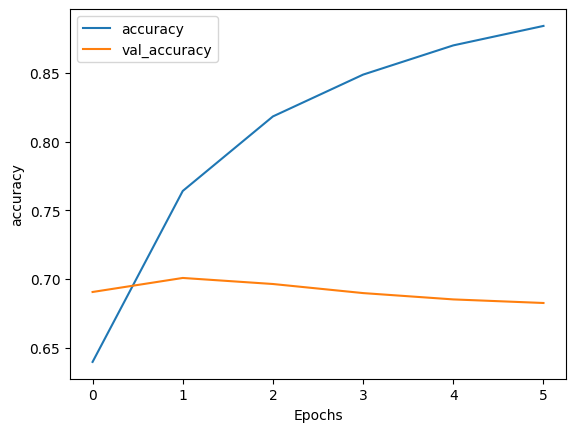

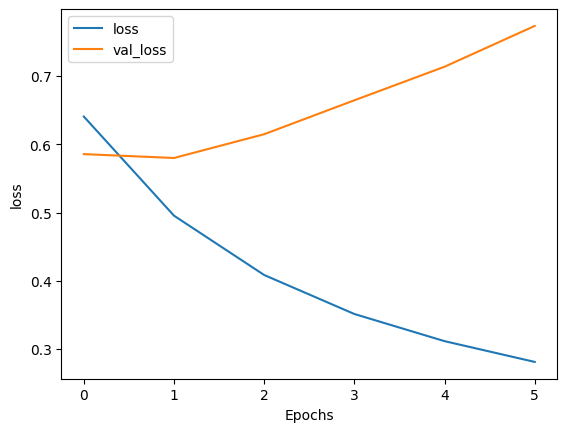

In [141]:
plot_graphs(h, "accuracy")
plot_graphs(h, "loss")

# Embedding dim

In [146]:
np.power(vocab_size, .25).astype("int")

13

In [147]:
vocab_size = 29_000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post",maxlen=15, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post",maxlen=15, truncating="post")


model = tf.keras.models.Sequential(
    [
        # vocab_size pour la taille du vocabulaire
        # ici 13 est mis pour le nombre de caractéristiques qu'on apprend sur chaque mot
        # on recommande de prendre la racine quatrième du vocab_size
        Embedding(vocab_size, np.power(vocab_size, .25).astype("int")),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation ="relu"),
        tf.keras.layers.Dense(1, activation ="sigmoid")
    ]
)

best_model = "best_model_text.h5"
# permet de sauvegarder le meileur modèle au cours de l'entrainement
model_ckp = ModelCheckpoint(filepath = best_model,
                            monitor = "val_accuracy",
                            mode ="max",
                            save_best_only = True)
# On arrête l'entrainement si après deux époques la performance du modèle n'augmente plus (sur la base de l'accuracy)
# si c'était sur la base du loss (on observerait plutôt la dimunition)
stop = EarlyStopping(monitor = "val_accuracy", patience = 4)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [148]:
h = model.fit(training_padded, training_labels, epochs = 50,
              validation_data=(test_padded,test_labels),
              callbacks= [model_ckp])

Epoch 1/50
625/625 [==============================] - 5s 6ms/step - loss: 0.6514 - accuracy: 0.6285 - val_loss: 0.6012 - val_accuracy: 0.6790
Epoch 2/50
 19/625 [..............................] - ETA: 3s - loss: 0.5522 - accuracy: 0.7385

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 4s 6ms/step - loss: 0.5084 - accuracy: 0.7594 - val_loss: 0.5784 - val_accuracy: 0.6958
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 0.4170 - accuracy: 0.8127 - val_loss: 0.6127 - val_accuracy: 0.6972
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3600 - accuracy: 0.8451 - val_loss: 0.6501 - val_accuracy: 0.6908
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 0.3191 - accuracy: 0.8674 - val_loss: 0.6991 - val_accuracy: 0.6866
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2867 - accuracy: 0.8823 - val_loss: 0.7557 - val_accuracy: 0.6830
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2656 - accuracy: 0.8926 - val_loss: 0.8052 - val_accuracy: 0.6774
Epoch 8/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2461 - accuracy: 0.9018 - val_loss: 0.8535 - val_accuracy: 0.6760
Epoch 9/50
625/62

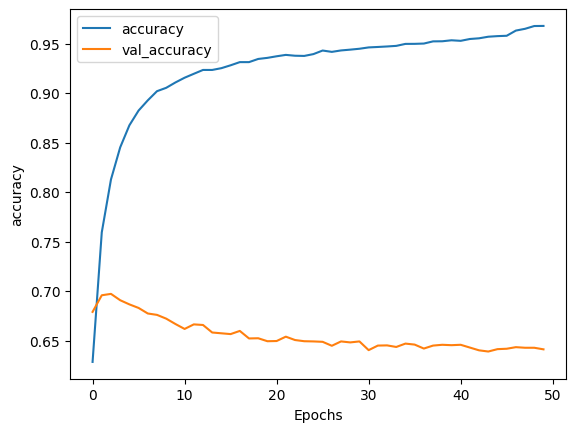

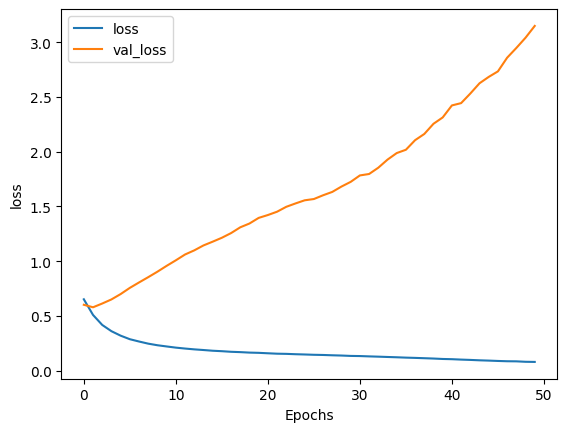

In [149]:
plot_graphs(h, "accuracy")
plot_graphs(h, "loss")

# Architecture du modèle

In [150]:
vocab_size = 29_000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post",maxlen=15, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post",maxlen=15, truncating="post")


model = tf.keras.models.Sequential(
    [
        # vocab_size pour la taille du vocabulaire
        # ici 13 est mis pour le nombre de caractéristiques qu'on apprend sur chaque mot
        # on recommande de prendre la racine quatrième du vocab_size
        Embedding(vocab_size, np.power(vocab_size, .25).astype("int")),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(5, activation ="relu"),
        tf.keras.layers.Dense(3, activation ="relu"),
        tf.keras.layers.Dense(1, activation ="sigmoid")
    ]
)

best_model = "best_model_text.h5"
# permet de sauvegarder le meileur modèle au cours de l'entrainement
model_ckp = ModelCheckpoint(filepath = best_model,
                            monitor = "val_accuracy",
                            mode ="max",
                            save_best_only = True)
# On arrête l'entrainement si après deux époques la performance du modèle n'augmente plus (sur la base de l'accuracy)
# si c'était sur la base du loss (on observerait plutôt la dimunition)
stop = EarlyStopping(monitor = "val_accuracy", patience = 4)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [151]:
h = model.fit(training_padded, training_labels, epochs = 50,
              validation_data=(test_padded,test_labels),
              callbacks= [model_ckp])

Epoch 1/50
625/625 [==============================] - 5s 7ms/step - loss: 0.6436 - accuracy: 0.6402 - val_loss: 0.5858 - val_accuracy: 0.6914
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 0.4901 - accuracy: 0.7688 - val_loss: 0.5832 - val_accuracy: 0.7028
Epoch 3/50
625/625 [==============================] - 4s 7ms/step - loss: 0.4004 - accuracy: 0.8242 - val_loss: 0.6234 - val_accuracy: 0.6986
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 0.3440 - accuracy: 0.8533 - val_loss: 0.6761 - val_accuracy: 0.6886
Epoch 5/50
625/625 [==============================] - 4s 7ms/step - loss: 0.3040 - accuracy: 0.8734 - val_loss: 0.7413 - val_accuracy: 0.6840
Epoch 6/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2763 - accuracy: 0.8873 - val_loss: 0.7887 - val_accuracy: 0.6790
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2541 - accuracy: 0.8994 - val_loss: 0.8386 - val_accuracy: 0.6734
Epoch 

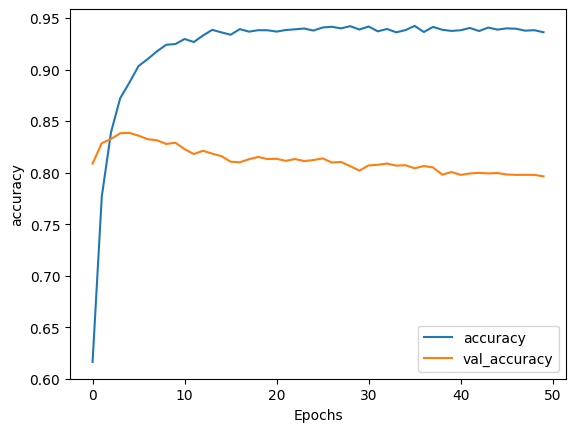

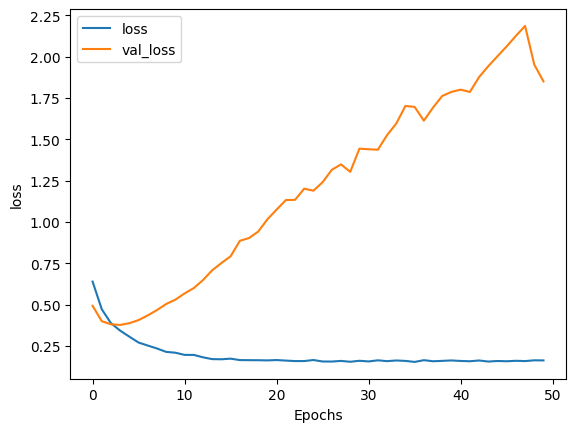

In [164]:
plot_graphs(h, "accuracy")
plot_graphs(h, "loss")

# Max Len & Dropout

In [155]:
# on parcous l'ensemble des phrases du train pour chercher la taille optimale de maxlen à passer
# en paramètre

tailles = []
for sent in training_sentences:
  tailles.append(len(sent.split(" ")))

In [158]:
np.array(tailles).min(), np.array(tailles).max(), np.array(tailles).mean(),  np.median(np.array(tailles))

(10, 2470, 233.90165, 174.0)

In [160]:
vocab_size = 29_000
maxlen = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding="post",maxlen=maxlen, truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding="post",maxlen=maxlen, truncating="post")


model = tf.keras.models.Sequential(
    [
        # vocab_size pour la taille du vocabulaire
        # ici 13 est mis pour le nombre de caractéristiques qu'on apprend sur chaque mot
        # on recommande de prendre la racine quatrième du vocab_size
        Embedding(vocab_size, np.power(vocab_size, .25).astype("int")),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(5, activation ="relu"),
        tf.keras.layers.Dropout(.25),
        tf.keras.layers.Dense(3, activation ="relu"),
        tf.keras.layers.Dropout(.25),
        tf.keras.layers.Dense(1, activation ="sigmoid")
    ]
)

best_model = "best_model_text.h5"
# permet de sauvegarder le meileur modèle au cours de l'entrainement
model_ckp = ModelCheckpoint(filepath = best_model,
                            monitor = "val_accuracy",
                            mode ="max",
                            save_best_only = True)
# On arrête l'entrainement si après deux époques la performance du modèle n'augmente plus (sur la base de l'accuracy)
# si c'était sur la base du loss (on observerait plutôt la dimunition)
stop = EarlyStopping(monitor = "val_accuracy", patience = 4)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [161]:
h = model.fit(training_padded, training_labels, epochs = 50,
              validation_data=(test_padded,test_labels),
              callbacks= [model_ckp])

Epoch 1/50
625/625 [==============================] - 7s 9ms/step - loss: 0.6397 - accuracy: 0.6163 - val_loss: 0.4933 - val_accuracy: 0.8088
Epoch 2/50
 10/625 [..............................] - ETA: 7s - loss: 0.5091 - accuracy: 0.7563

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 5s 8ms/step - loss: 0.4721 - accuracy: 0.7768 - val_loss: 0.3999 - val_accuracy: 0.8286
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 0.3878 - accuracy: 0.8389 - val_loss: 0.3812 - val_accuracy: 0.8326
Epoch 4/50
625/625 [==============================] - 6s 9ms/step - loss: 0.3427 - accuracy: 0.8722 - val_loss: 0.3774 - val_accuracy: 0.8382
Epoch 5/50
625/625 [==============================] - 5s 8ms/step - loss: 0.3063 - accuracy: 0.8873 - val_loss: 0.3880 - val_accuracy: 0.8386
Epoch 6/50
625/625 [==============================] - 6s 9ms/step - loss: 0.2708 - accuracy: 0.9035 - val_loss: 0.4066 - val_accuracy: 0.8358
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2527 - accuracy: 0.9103 - val_loss: 0.4353 - val_accuracy: 0.8324
Epoch 8/50
625/625 [==============================] - 5s 7ms/step - loss: 0.2349 - accuracy: 0.9177 - val_loss: 0.4675 - val_accuracy: 0.8314
Epoch 9/50
625/62

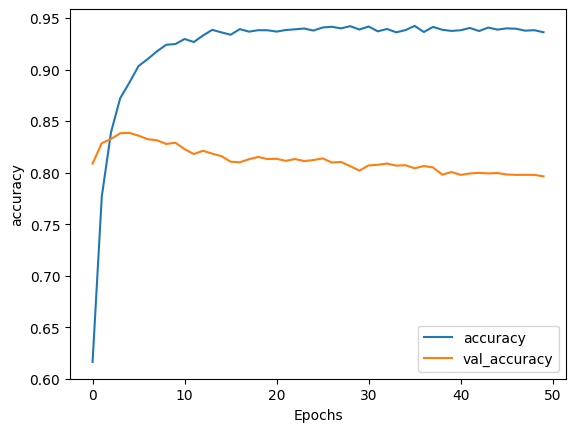

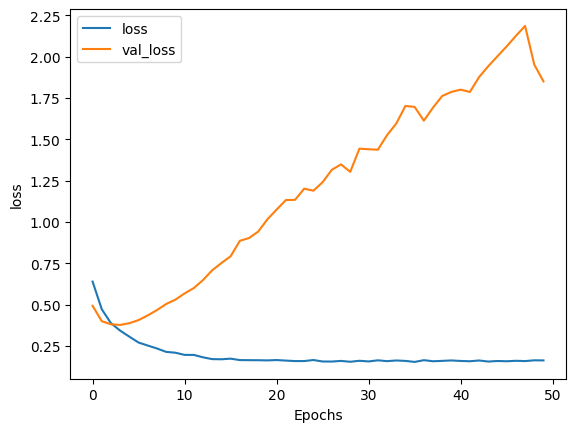

In [165]:
plot_graphs(h, "accuracy")
plot_graphs(h, "loss")

In [167]:
from tensorflow.keras.models import load_model

In [168]:
model_text = load_model("best_model_text.h5")

In [169]:
model_text.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 13)          377000    
                                                                 
 global_average_pooling1d_7  (None, 13)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_16 (Dense)            (None, 5)                 70        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_17 (Dense)            (None, 3)                 18        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                      

In [174]:
test_padded[45]

array([   60,   450,    29,    64,   117,    14,  4834,     1,     1,
           6,  2317,     3,   134,     7,  1094,   572,    25,   558,
          14,   575,     3,  6007,    37,   987,     9,   192,    13,
        2757,   874,     6,   371,    90,     9,     2,    88,  8204,
        9171,   313,   194,    27,    14,     2,  9454,     5,  8204,
         260,   341,     2,   273,    33,     1,    36,  1065,     4,
        4949,     5,  9171,    27,  2601,    13,     2,  1878,     1,
           3,  6730,  2939,   907,     2, 12194,  8204,     6,  9171,
          44,     7,    62,   796,    13,  9171,   123,     4,   925,
         294,     9,     2,    66,    19,     2,    66,     7,    24,
        1106,   280,  1896,    10,    22,   352,    11,   347,     6,
           1], dtype=int32)

# Transfert Learning

In [179]:
 !pip install --upgrade tensorflow_hub

In [182]:
import tensorflow_hub as hub

In [184]:
embed = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")
embeddings = embed(tf.constant(["cat is on the mat", "dog is in the fog"]))

In [188]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1",
                           output_shape = [20], input_shape=[], dtype=tf.string)

In [186]:
embeddings.shape

TensorShape([2, 20])

In [189]:
model = tf.keras.models.Sequential(
    [
        # on remplace le nouvel embedding par celui pris sur google
        hub_layer,
        tf.keras.layers.Dense(5, activation ="relu"),
        tf.keras.layers.Dropout(.25),
        tf.keras.layers.Dense(3, activation ="relu"),
        tf.keras.layers.Dropout(.25),
        tf.keras.layers.Dense(1, activation ="sigmoid")
    ]
)

best_model = "best_model_text.h5"
# permet de sauvegarder le meileur modèle au cours de l'entrainement
model_ckp = ModelCheckpoint(filepath = best_model,
                            monitor = "val_accuracy",
                            mode ="max",
                            save_best_only = True)
# On arrête l'entrainement si après deux époques la performance du modèle n'augmente plus (sur la base de l'accuracy)
# si c'était sur la base du loss (on observerait plutôt la dimunition)
stop = EarlyStopping(monitor = "val_accuracy", patience = 4)

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

h = model.fit(training_sentences, training_labels, epochs = 50,
              validation_data=(test_sentences,test_labels),
              callbacks= [model_ckp])

ValueError: ignored